# Project 032018
We process the data sets to understand some activites

In [395]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [396]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

In [397]:
import plotly.plotly as py
import plotly.graph_objs as go

In [398]:
import datetime
from dateutil.parser import parse

# Load and Overview the Data

In [38]:
parse("06/04/16 09:56:10")

datetime.datetime(2016, 6, 4, 9, 56, 10)

In [5]:
# dateparse = lambda dates: [pd.datetime.strptime(d, '%d%M%y:%H:%M:%S') for d in dates]
actiGraph_df = pd.read_csv("ActiGraph Minute Dataset.csv", parse_dates=['Datetime'])

In [6]:
actiGraph_df.head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,10062C,22JUN16:09:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
1,10062C,22JUN16:09:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2,10062C,22JUN16:09:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
3,10062C,22JUN16:09:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
4,10062C,22JUN16:10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


In [7]:
actiGraph_df['Datetime'] = actiGraph_df['ACTDT'] + " " + actiGraph_df['Time']

In [8]:
actiGraph_df.head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,10062C,06/22/2016 9:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
1,10062C,06/22/2016 9:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2,10062C,06/22/2016 9:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
3,10062C,06/22/2016 9:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
4,10062C,06/22/2016 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


In [9]:
actiGraph_df.shape

(5886177, 17)

In [5]:
from sas7bdat import SAS7BDAT
with SAS7BDAT('actimin.sas7bdat') as f:
    for row in f:
        print(row)
        break

['Subid', 'Datetime', 'ACTDT', 'Day', 'Week', 'Time', 'Hour', 'Minute', 'age_visit', 'Gender', 'Race', 'Ethnic', 'BMI', 'SmokCigNow', 'ATS_PackYears', 'finalGold', 'SGRQ_scoreTotal', 'MMRCDyspneaScor', 'Steps', 'Lux', 'YCnt', 'XCnt', 'ZCnt', 'Calories', 'VMU', 'Wear', 'WearSens']


In [6]:
actiMin_df = pd.read_sas("actimin.sas7bdat")

In [7]:
actiMin_df.shape

(5886177, 27)

In [8]:
actiMin_df.head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,age_visit,Gender,...,MMRCDyspneaScor,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,b'10062C',1.782209e+09,2016-06-22,1.0,1.0,35760.0,9.0,56.0,70.0,1.0,...,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,b'True',3.0
1,b'10062C',1.782209e+09,2016-06-22,1.0,1.0,35820.0,9.0,57.0,70.0,1.0,...,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,b'True',3.0
2,b'10062C',1.782209e+09,2016-06-22,1.0,1.0,35880.0,9.0,58.0,70.0,1.0,...,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,b'True',3.0
3,b'10062C',1.782209e+09,2016-06-22,1.0,1.0,35940.0,9.0,59.0,70.0,1.0,...,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,b'True',3.0
4,b'10062C',1.782209e+09,2016-06-22,1.0,1.0,36000.0,10.0,0.0,70.0,1.0,...,2.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,b'True',3.0


In [15]:
sum(actiGraph_df['Lux'].isnull())

3922181

In [7]:
actiGraph_df.columns

Index(['Subid', 'Datetime', 'ACTDT', 'Day', 'Week', 'Time', 'Hour', 'Minute',
       'Steps', 'Lux', 'YCnt', 'XCnt', 'ZCnt', 'Calories', 'VMU', 'Wear',
       'WearSens'],
      dtype='object')

In [10]:
actiMin_df.columns

Index(['Subid', 'Datetime', 'ACTDT', 'Day', 'Week', 'Time', 'Hour', 'Minute',
       'age_visit', 'Gender', 'Race', 'Ethnic', 'BMI', 'SmokCigNow',
       'ATS_PackYears', 'finalGold', 'SGRQ_scoreTotal', 'MMRCDyspneaScor',
       'Steps', 'Lux', 'YCnt', 'XCnt', 'ZCnt', 'Calories', 'VMU', 'Wear',
       'WearSens'],
      dtype='object')

# How a Record Looks Like

In [42]:
actiGraph_df.iloc[0, :]

Subid                   10062C
Datetime    06/22/2016 9:56:00
ACTDT               06/22/2016
Day                          1
Week                         1
Time                   9:56:00
Hour                         9
Minute                      56
Steps                        0
Lux                        NaN
YCnt                         0
XCnt                         0
ZCnt                         0
Calories                     0
VMU                          0
Wear                      True
WearSens                     3
Name: 0, dtype: object

In [43]:
print("The total number of patients:")
len(actiGraph_df['Subid'].unique())

The total number of patients:


183

# Take a Look at One Patient's Data

In [10]:
pt_df = actiGraph_df[actiGraph_df['Subid'] == '10062C']

In [11]:
pt_df.shape

(31740, 17)

In [12]:
31740 * 183

5808420

In [13]:
pt_df.head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,10062C,06/22/2016 9:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
1,10062C,06/22/2016 9:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2,10062C,06/22/2016 9:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
3,10062C,06/22/2016 9:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
4,10062C,06/22/2016 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


In [14]:
pt_df.describe()

,Day,Week,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,WearSens
count,31740.000000,29643.000000,31740.000000,31740.000000,31740.000000,0.0,31740.000000,31740.000000,31740.000000,31740.000000,31740.000000,31740.000000
mean,11.935381,2.020140,11.497353,29.501638,2.175614,NaN,781.557656,704.307876,875.102268,1.737195,1412.499923,1.122401
std,6.375889,0.812139,6.915797,17.318422,8.055522,NaN,1122.667787,1115.383911,1310.257557,2.559009,2024.540723,0.656457
min,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,6.000000,15.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,12.000000,2.000000,11.000000,30.000000,0.000000,NaN,177.000000,83.000000,161.000000,0.170654,347.606818,1.000000
75%,17.000000,3.000000,17.000000,45.000000,0.000000,NaN,1276.000000,1010.000000,1356.250000,2.656147,2231.455691,1.000000
max,23.000000,3.000000,23.000000,59.000000,85.000000,NaN,9278.000000,10448.000000,10692.000000,7.368409,15674.563375,3.000000


In [15]:
pt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31740 entries, 0 to 31739
Data columns (total 17 columns):
Subid       31740 non-null object
Datetime    31740 non-null object
ACTDT       31740 non-null object
Day         31740 non-null float64
Week        29643 non-null float64
Time        31740 non-null object
Hour        31740 non-null int64
Minute      31740 non-null int64
Steps       31740 non-null int64
Lux         0 non-null float64
YCnt        31740 non-null int64
XCnt        31740 non-null int64
ZCnt        31740 non-null int64
Calories    31740 non-null float64
VMU         31740 non-null float64
Wear        31740 non-null bool
WearSens    31740 non-null int64
dtypes: bool(1), float64(5), int64(7), object(4)
memory usage: 4.1+ MB


## Convert the Datetime Strings to Datetime Objects

In [16]:
dateparse = lambda d: parse(d)
pt_df['Datetime'] = pt_df['Datetime'].apply(dateparse)

/Users/yan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
pt_df['Datetime'][:5]

0   2016-06-22 09:56:00
1   2016-06-22 09:57:00
2   2016-06-22 09:58:00
3   2016-06-22 09:59:00
4   2016-06-22 10:00:00
Name: Datetime, dtype: datetime64[ns]

## Plot the Entire XCnt for the Patient

In [399]:
XCnt = go.Scatter(
    x=pt_df.Datetime, 
    y=pt_df.XCnt,
    name = "XCnt",
    hoveron = pt_df.XCnt,
    showlegend = True
)

xaxis_show = dict(
    title = "Time",
    showline = True
)
yaxis_show = dict(
    title = "XCnt",
    showline = True
)
layout = dict(title = 'XCnt for a Patient',
              hovermode= 'closest',
              xaxis = xaxis_show,
              yaxis = yaxis_show
             )
data =[XCnt]

In [400]:
fig = dict(data=data, layout=layout)
py.iplot(fig, )

### WearSens Field

WearSens Specification:
- 0 = Non-Wear
- 1 = Wear
- 2 = Calibrating (the wear sensor calibrates for 10 seconds after it is unplugged from a docking station)
- 3 = Device is plugged into docking station

In [31]:
data= [go.Scatter(
    x = pt_df.Datetime,
    y = pt_df.WearSens, 
    mode = "markers"
)]

py.iplot(data)

## Plot the XCnt for Different WearSens Values

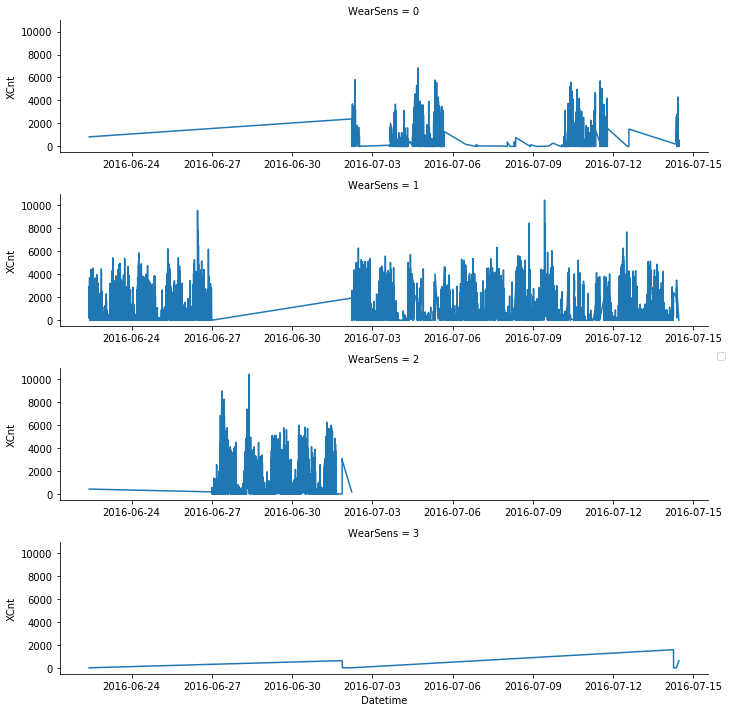

In [27]:
grid = snb.FacetGrid(pt_df, row='WearSens', size = 2.5, aspect = 4)
grid.map(plt.plot, 'Datetime','XCnt')
grid.add_legend();

## Plot XCnt, YCnt, ZCnt for the Patient

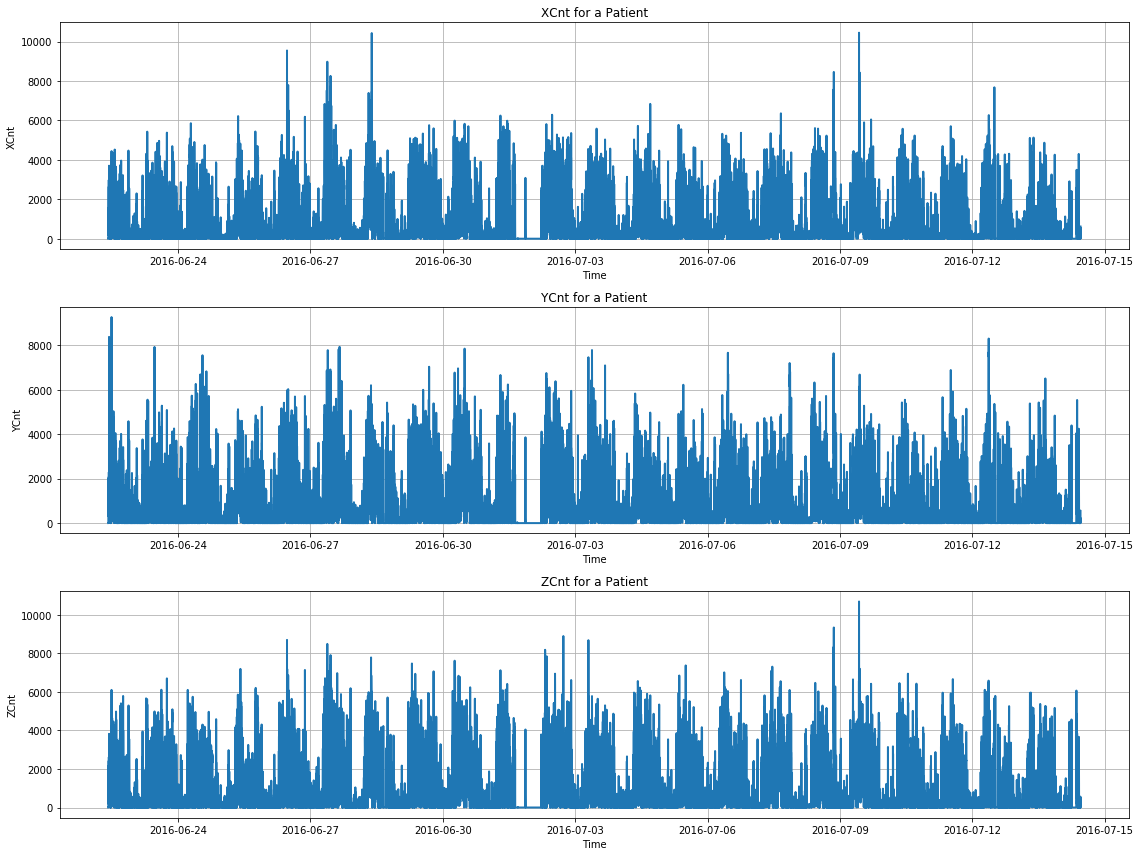

In [50]:
plt.figure(figsize = (16, 12))

plt.subplot(311)
plt.plot(pt_df.Datetime, pt_df.XCnt, '-', lw=2)

plt.xlabel('Time')
plt.ylabel('XCnt')
plt.title('XCnt for a Patient')
plt.grid(True)

plt.subplot(312)
plt.plot(pt_df.Datetime, pt_df.YCnt, '-', lw=2)

plt.xlabel('Time')
plt.ylabel('YCnt')
plt.title('YCnt for a Patient')
plt.grid(True)

plt.subplot(313)
plt.plot(pt_df.Datetime, pt_df.ZCnt, '-', lw=2)

plt.xlabel('Time')
plt.ylabel('ZCnt')
plt.title('ZCnt for a Patient')
plt.grid(True)

plt.tight_layout()
plt.show()

## Extract and Plot 4 Days Data for the Patient

In [39]:
pt_df_4days = pt_df[pt_df['Datetime'] >= '06/24/2016']

In [40]:
pt_df_4days = pt_df_4days[pt_df_4days.Datetime <= '06/27/2016']

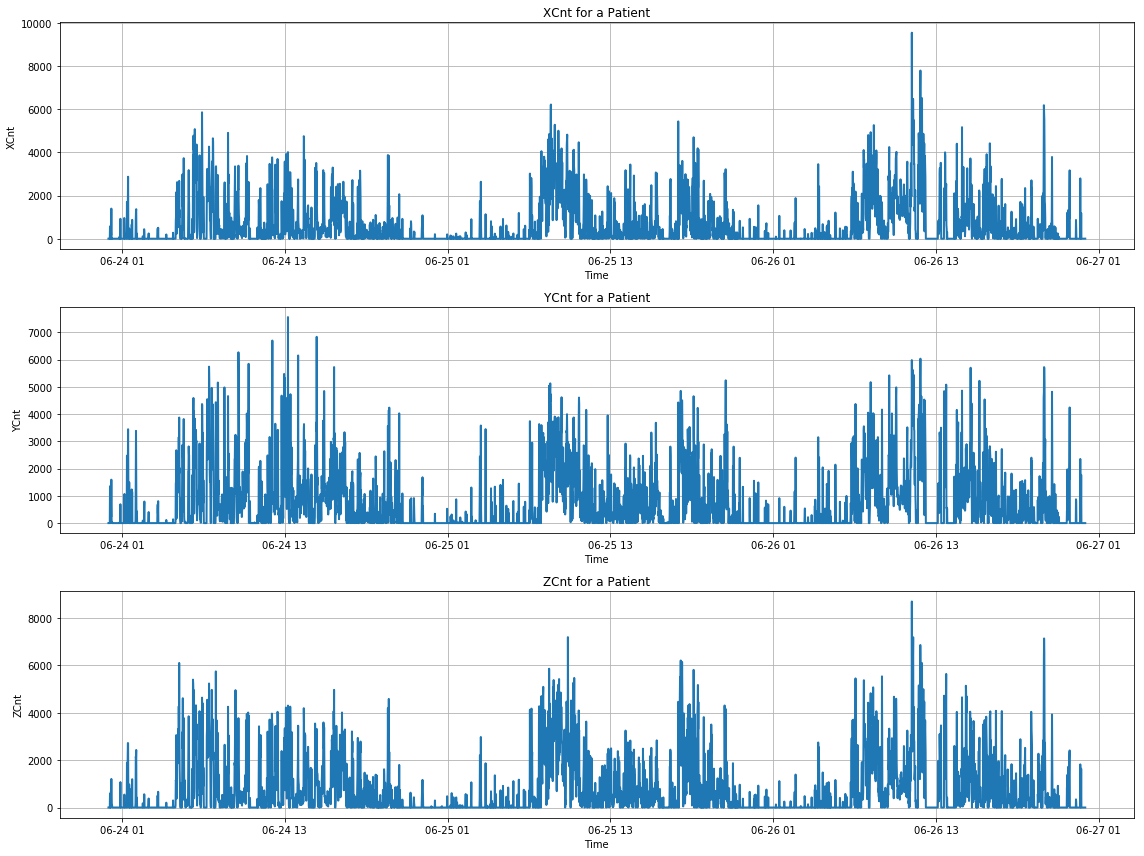

In [51]:
plt.figure(figsize = (16, 12))

plt.subplot(311)
plt.plot(pt_df_4days.Datetime, pt_df_4days.XCnt, '-', lw=2)

plt.xlabel('Time')
plt.ylabel('XCnt')
plt.title('XCnt for a Patient')
plt.grid(True)

plt.subplot(312)
plt.plot(pt_df_4days.Datetime, pt_df_4days.YCnt, '-', lw=2)

plt.xlabel('Time')
plt.ylabel('YCnt')
plt.title('YCnt for a Patient')
plt.grid(True)

plt.subplot(313)
plt.plot(pt_df_4days.Datetime, pt_df_4days.ZCnt, '-', lw=2)

plt.xlabel('Time')
plt.ylabel('ZCnt')
plt.title('ZCnt for a Patient')
plt.grid(True)

plt.tight_layout()
plt.show()

## How Many Days the Patien's Data Span

In [52]:
pt_df.head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,10062C,2016-06-22 09:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
1,10062C,2016-06-22 09:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2,10062C,2016-06-22 09:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
3,10062C,2016-06-22 09:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
4,10062C,2016-06-22 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


In [55]:
pt_df.groupby("ACTDT")['Time'].count()

ACTDT
06/22/2016     844
06/23/2016    1440
06/24/2016    1440
06/25/2016    1440
06/26/2016    1440
06/27/2016    1439
06/28/2016    1440
06/29/2016    1440
06/30/2016    1440
07/01/2016    1440
07/02/2016    1440
07/03/2016    1440
07/04/2016    1440
07/05/2016    1440
07/06/2016    1440
07/07/2016    1440
07/08/2016    1440
07/09/2016    1440
07/10/2016    1440
07/11/2016    1440
07/12/2016    1440
07/13/2016    1440
07/14/2016     657
Name: Time, dtype: int64

In [56]:
pt_df[pt_df['ACTDT'] == '06/23/2016'].head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
844,10062C,2016-06-23 00:00:00,06/23/2016,2.0,1.0,0:00:00,0,0,0,NaN,0,0,0,0.0,0.0,True,1
845,10062C,2016-06-23 00:01:00,06/23/2016,2.0,1.0,0:01:00,0,1,0,NaN,0,0,0,0.0,0.0,True,1
846,10062C,2016-06-23 00:02:00,06/23/2016,2.0,1.0,0:02:00,0,2,0,NaN,0,0,0,0.0,0.0,True,1
847,10062C,2016-06-23 00:03:00,06/23/2016,2.0,1.0,0:03:00,0,3,0,NaN,0,0,0,0.0,0.0,True,1
848,10062C,2016-06-23 00:04:00,06/23/2016,2.0,1.0,0:04:00,0,4,0,NaN,0,0,0,0.0,0.0,True,1


In [57]:
pt_df[pt_df['ACTDT'] == '06/23/2016'].tail()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
2279,10062C,2016-06-23 23:55:00,06/23/2016,2.0,1.0,23:55:00,23,55,0,NaN,0,0,0,0.0,0.0,True,1
2280,10062C,2016-06-23 23:56:00,06/23/2016,2.0,1.0,23:56:00,23,56,0,NaN,0,0,0,0.0,0.0,True,1
2281,10062C,2016-06-23 23:57:00,06/23/2016,2.0,1.0,23:57:00,23,57,0,NaN,0,0,0,0.0,0.0,True,1
2282,10062C,2016-06-23 23:58:00,06/23/2016,2.0,1.0,23:58:00,23,58,0,NaN,0,0,0,0.0,0.0,True,1
2283,10062C,2016-06-23 23:59:00,06/23/2016,2.0,1.0,23:59:00,23,59,0,NaN,0,0,0,0.0,0.0,True,1


In [61]:
pt_df.index = pt_df.Datetime

In [62]:
pt_df.head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
Datetime,,,,,,,,,,,,,,,,,
2016-06-22 09:56:00,10062C,2016-06-22 09:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 09:57:00,10062C,2016-06-22 09:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 09:58:00,10062C,2016-06-22 09:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 09:59:00,10062C,2016-06-22 09:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 10:00:00,10062C,2016-06-22 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


## Plot the XCnt and Daily Average for the Patient

In [63]:
pt_xcnt = pt_df['XCnt']

In [88]:
pt_xcnt_days = pt_xcnt.resample('D').mean()
datestring = lambda d: d.strftime('%m/%d/%y')
xlabs = pt_xcnt_days.index.strftime('%m/%d/%y')
xlabs

array(['06/22/16', '06/23/16', '06/24/16', '06/25/16', '06/26/16',
       '06/27/16', '06/28/16', '06/29/16', '06/30/16', '07/01/16',
       '07/02/16', '07/03/16', '07/04/16', '07/05/16', '07/06/16',
       '07/07/16', '07/08/16', '07/09/16', '07/10/16', '07/11/16',
       '07/12/16', '07/13/16', '07/14/16'], dtype='<U8')

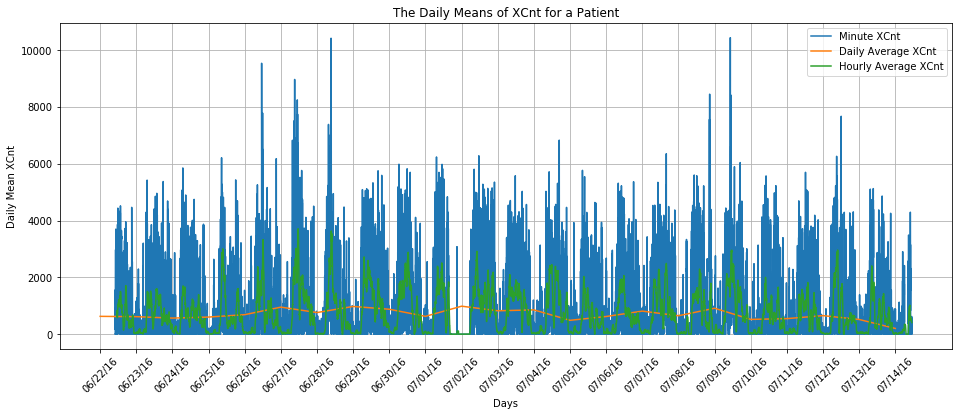

In [117]:
plt.figure(figsize=[16, 6])
plt.plot(pt_xcnt, label="Minute XCnt")
plt.plot(pt_xcnt_days, label="Daily Average XCnt")
plt.plot(pt_xcnt.rolling(60).mean(), label="Hourly Average XCnt")
plt.xticks(xlabs, xlabs, rotation=45)
plt.xlabel("Days")
plt.ylabel("Daily Mean XCnt")
plt.title("The Daily Means of XCnt for a Patient")
plt.legend()
plt.grid()
plt.show()

## How Do the 183 Patients' Timespans Overlap?

In [97]:
ids = actiGraph_df.Subid.unique()

In [103]:
actiGraph_df['Datetime'] = actiGraph_df['Datetime'].apply(dateparse)

In [104]:
actiGraph_df['Datetime'][:4]

0   2016-06-22 09:56:00
1   2016-06-22 09:57:00
2   2016-06-22 09:58:00
3   2016-06-22 09:59:00
Name: Datetime, dtype: datetime64[ns]

In [106]:
actiGraph_df['Datetime'].max()

Timestamp('2016-10-26 13:31:00')

In [107]:
actiGraph_df['Datetime'].min()

Timestamp('2016-03-09 09:44:00')

In [109]:
actiGraph_df.head()

,Subid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,10062C,2016-06-22 09:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
1,10062C,2016-06-22 09:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2,10062C,2016-06-22 09:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
3,10062C,2016-06-22 09:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
4,10062C,2016-06-22 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


In [110]:
ids_test = ids[0:2]
ids_test

array(['10062C', '10077P'], dtype=object)

In [216]:
id2days = {}
lens = []
for id in ids:    
    dt_list = actiGraph_df[actiGraph_df['Subid'] == id]['Datetime'].dt.date.unique()
    id2days[id] = dt_list
    lens.append(len(dt_list))

(array([  4.,   1.,   0.,   6.,   1.,  19., 120.,  25.,   6.,   1.]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <a list of 10 Patch objects>)

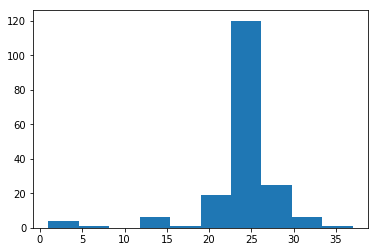

In [217]:
plt.hist(lens)

In [218]:
sum([1 for e in lens if e >= 21])

171

In [219]:
np.max([len(id2days[ele]) for ele in id2days])

37

In [220]:
np.max(lens)

37

In [237]:
np.min(lens)

1

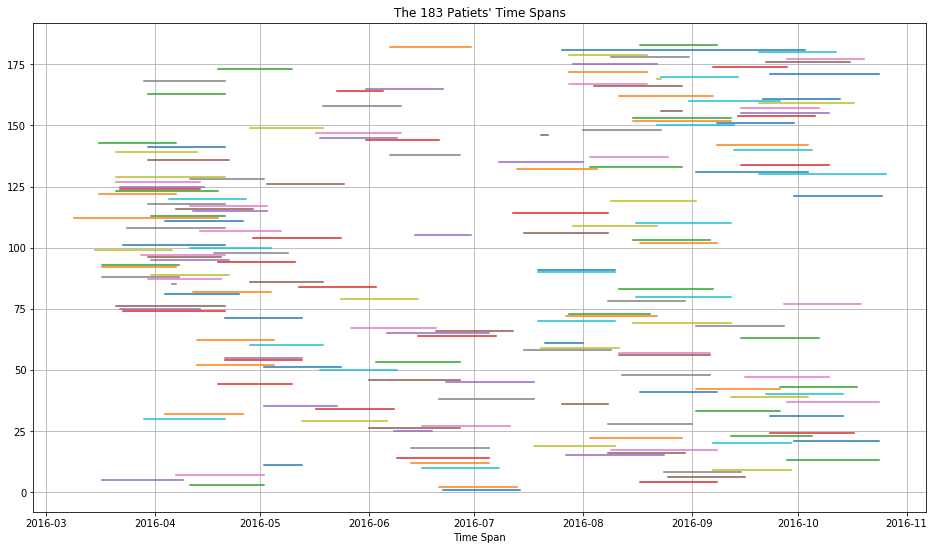

In [221]:
plt.figure(figsize=(16, 9))

#aId = list(id2days.keys())[0]
num = 1
count = 0
for aId in id2days:
    if count > 183:
        break
    aId_y = np.empty(len(id2days[aId]))
    aId_y.fill(num)
    plt.plot(id2days[aId], aId_y)
    num += 1
    count += 1

plt.grid()
plt.xlabel("Time Span")
plt.title("The 183 Patiets' Time Spans")
plt.show()

## Create Daily Average XCnt Table for 183 Patients
Each column is a patient's Daily Average XCnt. 

In [231]:
actiGraph_df[actiGraph_df['Subid'] == '10077P'][['Datetime', 'XCnt']] \
    .set_index('Datetime').resample('D').mean().count()

XCnt    23
dtype: int64

In [232]:
id2XCnts = {}
xcnt_lens = []
for id in ids:    
    xcnt_list = actiGraph_df[actiGraph_df['Subid'] == id][['Datetime', 'XCnt']] \
        .set_index('Datetime').resample('D').mean()
    id2XCnts[id] = xcnt_list
    xcnt_lens.append(xcnt_list.count())

In [235]:
np.max(xcnt_lens)

37

In [236]:
np.min(xcnt_lens)

1

## Apply tSNE on the 183 Daily Averages and Plot Them

In [347]:
ids = []
indxs = []
daily_xcnts = np.zeros((183, 20), dtype = np.float32)
count = 0
for indx, id in enumerate(id2XCnts.keys()):
    xcnts = id2XCnts[id]
    if xcnts.shape[0] >= 22 and sum(xcnts['XCnt'].isnull()) == 0:
        ids.append(id)
        indxs.append(indx)
        daily_xcnts[count] = np.array(xcnts['XCnt'][1:21])
        count += 1

In [341]:
for i, id in enumerate(id2XCnts.keys()):
    if i == 111:
        print(id)

22489C


In [342]:
sum(id2XCnts['22489C']['XCnt'].isnull())

18

In [343]:
count

159

In [348]:
daily_xcnts[111]

array([ 908.80554 , 1038.791   ,  805.14514 ,  751.36945 ,  841.3396  ,
        749.8028  ,  593.5757  ,  789.316   ,  795.98267 ,  583.70416 ,
        727.8139  ,  963.58264 ,  577.13196 ,  712.1556  ,  743.47986 ,
         23.918056,  679.72156 ,  578.4021  ,  847.98126 ,  718.54376 ],
      dtype=float32)

In [356]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(daily_xcnts[:159])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.000s...
[t-SNE] Computed neighbors for 159 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 352.513951
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.584511
[t-SNE] Error after 300 iterations: 0.393009
t-SNE done! Time elapsed: 1.117922067642212 seconds


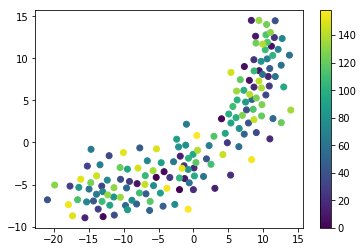

In [357]:
import matplotlib.cm as cm
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c = range(159), cmap='viridis')
plt.colorbar()

In [401]:
traceTSNE = go.Scatter(
    x = tsne_results[:,0],
    y = tsne_results[:,1],
    name = ids,
    hoveron = ids,
    mode = 'markers',
    text = ids,
    showlegend = True,
    marker = dict(
        size = 8,
        color = labels,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'TSNE (T-Distributed Stochastic Neighbour Embedding)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
#py.iplot(fig, filename='styled-scatter')
py.iplot(fig)

In [352]:
id2XCnts['15973Q']['XCnt']

Datetime
2016-04-19    1600.048896
2016-04-20    1093.531250
2016-04-21     967.313889
2016-04-22    1186.263889
2016-04-23    1162.029167
2016-04-24    1359.343056
2016-04-25     936.179861
2016-04-26    1295.754861
2016-04-27    1238.900000
2016-04-28    1008.306250
2016-04-29     999.734028
2016-04-30    1136.163194
2016-05-01    1097.615278
2016-05-02    1383.695139
2016-05-03    1595.061806
2016-05-04    1456.880556
2016-05-05    1194.031944
2016-05-06    1216.103472
2016-05-07    1102.475000
2016-05-08    1180.105556
2016-05-09     984.462500
2016-05-10    1148.030679
Freq: D, Name: XCnt, dtype: float64

In [353]:
id2XCnts['11055K']['XCnt']

Datetime
2016-07-27    334.833904
2016-07-28    156.726389
2016-07-29    186.761806
2016-07-30    153.322917
2016-07-31    168.976389
2016-08-01    205.812500
2016-08-02    230.708333
2016-08-03    151.541667
2016-08-04    173.432639
2016-08-05    172.975694
2016-08-06    207.616667
2016-08-07    208.732639
2016-08-08    177.586806
2016-08-09    129.048611
2016-08-10    146.072917
2016-08-11    160.597917
2016-08-12     47.859028
2016-08-13    124.268750
2016-08-14    140.525694
2016-08-15    164.511111
2016-08-16    166.088889
2016-08-17    173.861111
2016-08-18     14.963194
2016-08-19      2.536806
2016-08-20      0.261111
2016-08-21      1.113194
2016-08-22     11.277083
2016-08-23     12.789583
2016-08-24      7.763923
Freq: D, Name: XCnt, dtype: float64

# Clutersing the 183 Patients Using Their Daily XCent Average

In [359]:
# There are only 159 patients with more than 20 days measurements
sum([1 for i in range(daily_xcnts.shape[0]) if sum(daily_xcnts[i]) >0])

159

In [365]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [367]:
# Compute Affinity Propagation
X = daily_xcnts[:159]
clust = KMeans(n_clusters=3)
km = clust.fit(X)
cluster_centers = km.cluster_centers_
labels = km.labels_

n_clusters_ = len(cluster_centers)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


(array([60.,  0.,  0.,  0.,  0., 31.,  0.,  0.,  0., 68.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

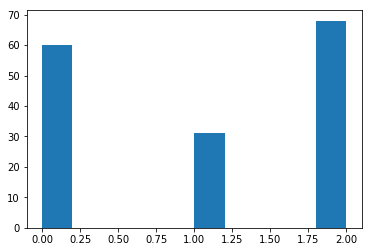

In [369]:
plt.hist(labels)

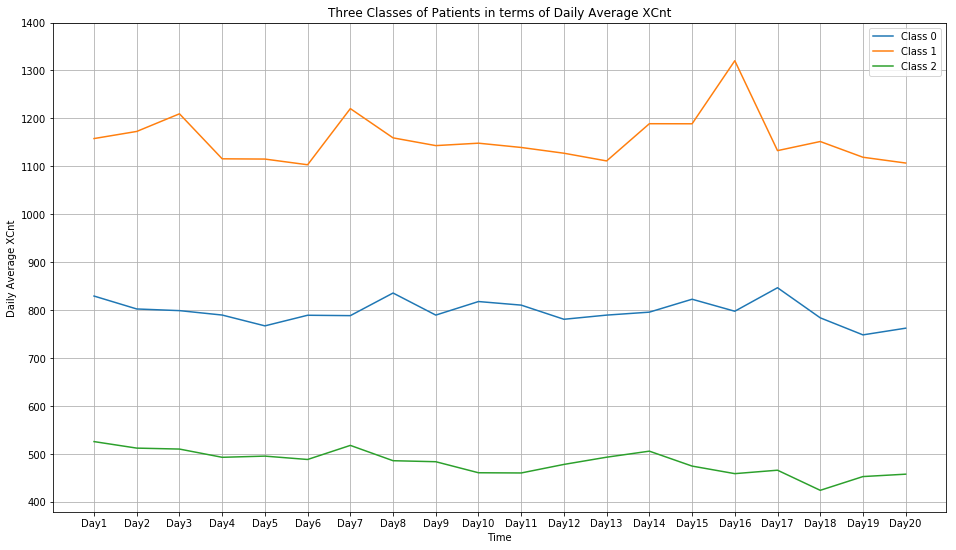

In [392]:
x_time = np.arange(1, 21)
plt.figure(figsize=(16,9))
for i in range(len(cluster_centers)):
    plt.plot(x_time, cluster_centers[i], label="Class " + str(i))
plt.legend()
plt.title("Three Classes of Patients in terms of Daily Average XCnt")
plt.xlabel("Time")
plt.ylabel("Daily Average XCnt")
plt.grid()
ticks = ["Day" + str(i) for i in x_time]
plt.xticks(x_time, ticks)
plt.yticks(range(400, 1500, 100))
plt.show()